# Project : Crime Analysis in Chicago by Facebook Prophet

In [0]:
!pip install pystan

In [0]:
!pip install fbprophet

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1irgVBpGpLHWKbDvuMgor9_bNCdNUSH9r'}) 
downloaded.GetContentFile('Chicago_Crimes_2005_to_2007.csv') 

downloaded1 = drive.CreateFile({'id':'13XZqaCw7CoWTehKWik9mknvasNJhR1np'}) 
downloaded1.GetContentFile('Chicago_Crimes_2008_to_2011.csv')

downloaded2 = drive.CreateFile({'id':'1mYyfTrB474qKZqngQVo0UAlwxFseYROL'}) 
downloaded2.GetContentFile('Chicago_Crimes_2012_to_2017.csv')

In [15]:
## loading the library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#from fbprophet import Prophet

In [16]:
# load the dataset

dataset1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
dataset2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
dataset3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


There is some problem loading this dataset.That's why here use 'error_bad_lines'.This can reduce the problem on loading the dataset.It is shown that there are some problem in the dataset and it skit all of this.

In [3]:
dataset1.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [4]:
dataset2.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,1907,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,2436,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"


In [5]:
print('1st dataset row and column: ' , dataset1.shape)
print('2nd dataset row and column: ' , dataset2.shape)
print('3rd dataset row and column: ' , dataset3.shape)

1st dataset row and column:  (1872343, 23)
2nd dataset row and column:  (2688710, 23)
3rd dataset row and column:  (1456714, 23)


In [6]:
1872343 + 2688710 + 1456714

6017767

It is a huge dataset.If we combine all of the dataset together then amount is 6 Million.

In [8]:
dataset1.isnull().sum()

Unnamed: 0                 0
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description      25
Arrest                     0
Domestic                   0
Beat                       0
District                   5
Ward                      15
Community Area           349
FBI Code                   0
X Coordinate            9154
Y Coordinate            9154
Year                       0
Updated On                 0
Latitude                9154
Longitude               9154
Location                9154
dtype: int64

In [9]:
dataset3.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

In [10]:
dataset2.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 6
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description      291
Arrest                      0
Domestic                    0
Beat                        0
District                   83
Ward                       63
Community Area           1455
FBI Code                    0
X Coordinate            28645
Y Coordinate            28645
Year                        0
Updated On                  0
Latitude                28645
Longitude               28645
Location                28645
dtype: int64

All the dataset have different in their missing columns and number.

In [11]:
dataset1.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,4,5
ID,4673626,4673627,4673628,4673629,4673630
Case Number,HM274058,HM202199,HM113861,HM274049,HM187120
Date,04/02/2006 01:00:00 PM,02/26/2006 01:40:48 PM,01/08/2006 11:16:00 PM,04/05/2006 06:45:00 PM,02/17/2006 09:03:14 PM
Block,055XX N MANGO AVE,065XX S RHODES AVE,013XX E 69TH ST,061XX W NEWPORT AVE,037XX W 60TH ST
IUCR,2825,2017,051A,0460,1811
Primary Type,OTHER OFFENSE,NARCOTICS,ASSAULT,BATTERY,NARCOTICS
Description,HARASSMENT BY TELEPHONE,MANU/DELIVER:CRACK,AGGRAVATED: HANDGUN,SIMPLE,POSS: CANNABIS 30GMS OR LESS
Location Description,RESIDENCE,SIDEWALK,OTHER,RESIDENCE,ALLEY
Arrest,False,True,False,False,True


In [17]:
## Concat the 3 datasets.

dataset = pd.concat([dataset1 , dataset2 , dataset3])

In [5]:
dataset.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 7
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
Beat                        0
District                   89
Ward                       92
Community Area           1844
FBI Code                    0
X Coordinate            74882
Y Coordinate            74882
Year                        0
Updated On                  0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

In [13]:
dataset.shape

(6017767, 23)

In [14]:
dataset.head(15)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
5,6,4673631,HM263167,03/30/2006 10:30:00 PM,014XX W 73RD PL,0560,ASSAULT,SIMPLE,APARTMENT,True,...,17.0,67.0,08A,1167688.0,1855998.0,2006,04/15/2016 08:55:02 AM,41.760401,-87.660982,"(41.760401372, -87.660982392)"
6,7,4673632,HM273234,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,...,45.0,11.0,08B,1140791.0,1932993.0,2006,04/15/2016 08:55:02 AM,41.972221,-87.757670,"(41.972220564, -87.75766982)"
7,8,4673633,HM275105,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,0820,THEFT,$500 AND UNDER,STREET,False,...,15.0,66.0,06,1160205.0,1859776.0,2006,04/15/2016 08:55:02 AM,41.770926,-87.688304,"(41.770925978, -87.688304107)"
8,9,4673634,HM275063,04/05/2006 09:30:00 PM,019XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,...,32.0,24.0,08A,1163122.0,1905349.0,2006,04/15/2016 08:55:02 AM,41.895923,-87.676334,"(41.895922672, -87.676333733)"
9,10,4673635,HM268513,04/03/2006 03:00:00 AM,063XX S EBERHART AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,20.0,42.0,08B,1180669.0,1863047.0,2006,04/15/2016 08:55:02 AM,41.779456,-87.613191,"(41.77945628, -87.613190628)"


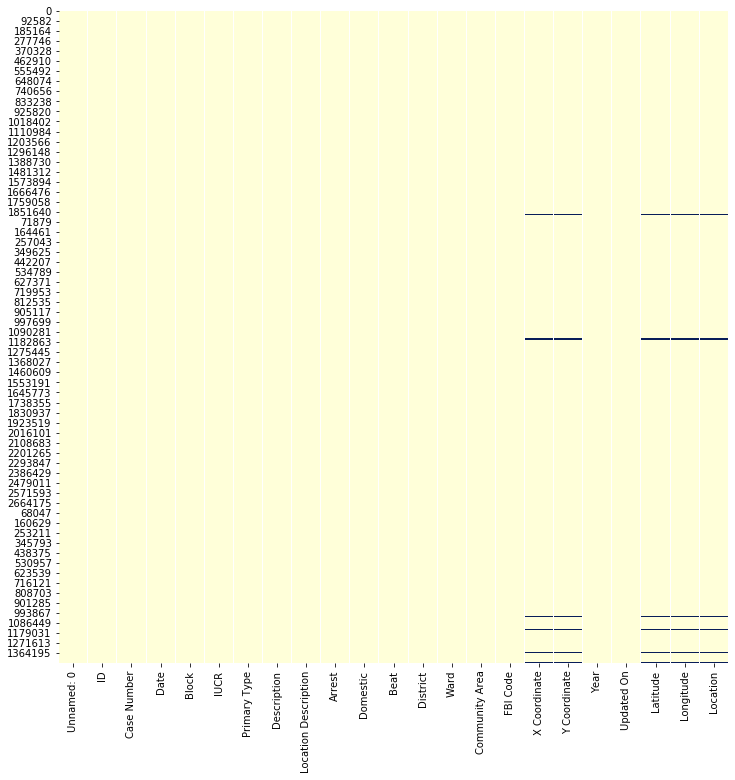

In [15]:
# Let's see how many null elements are contained in the data

plt.figure(figsize=(12 , 12))
sns.heatmap(dataset.isnull(), cbar = False, cmap = 'bwr')

## Exploratory Data Analysis

2 . Find out the most number of unique cases.(from Primary type column)

3 . Find the information from Description columns

4 . Which location have the most dangerous.(from location description column)

5 . Arrest was happend or not find.

6 . Work with Beat.

7 . Which part of the location find the ward.(from Ward col.)

8 . Work with year.

9 . Difference between updated.(from Updated On col.)

10 . Work with location.

11 . Relation between area and crime and type of crime

12 . Dangerous area and arrest relation.

13 . Year wise Crime.

In [18]:
dataset['Date']

0          04/02/2006 01:00:00 PM
1          02/26/2006 01:40:48 PM
2          01/08/2006 11:16:00 PM
3          04/05/2006 06:45:00 PM
4          02/17/2006 09:03:14 PM
                    ...          
1456709    05/03/2016 11:33:00 PM
1456710    05/03/2016 11:30:00 PM
1456711    05/03/2016 12:15:00 AM
1456712    05/03/2016 09:07:00 PM
1456713    05/03/2016 11:38:00 PM
Name: Date, Length: 6017767, dtype: object

Now change the date format.Make the date in a similar format in all rows.

In [19]:
## Change data format

dataset.Date = pd.to_datetime(dataset.Date , format = "%m/%d/%Y %I:%M:%S %p")

In [20]:
dataset.Date

0         2006-04-02 13:00:00
1         2006-02-26 13:40:48
2         2006-01-08 23:16:00
3         2006-04-05 18:45:00
4         2006-02-17 21:03:14
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 6017767, dtype: datetime64[ns]

In [21]:
# setting the index to be the date 
dataset.index = pd.DatetimeIndex(dataset.Date)

In [22]:
dataset.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2006-04-02 13:00:00,0,4673626,HM274058,2006-04-02 13:00:00,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
2006-02-26 13:40:48,1,4673627,HM202199,2006-02-26 13:40:48,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2006-01-08 23:16:00,2,4673628,HM113861,2006-01-08 23:16:00,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
2006-04-05 18:45:00,4,4673629,HM274049,2006-04-05 18:45:00,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
2006-02-17 21:03:14,5,4673630,HM187120,2006-02-17 21:03:14,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


### Most Popular crime type

In [5]:
dataset['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

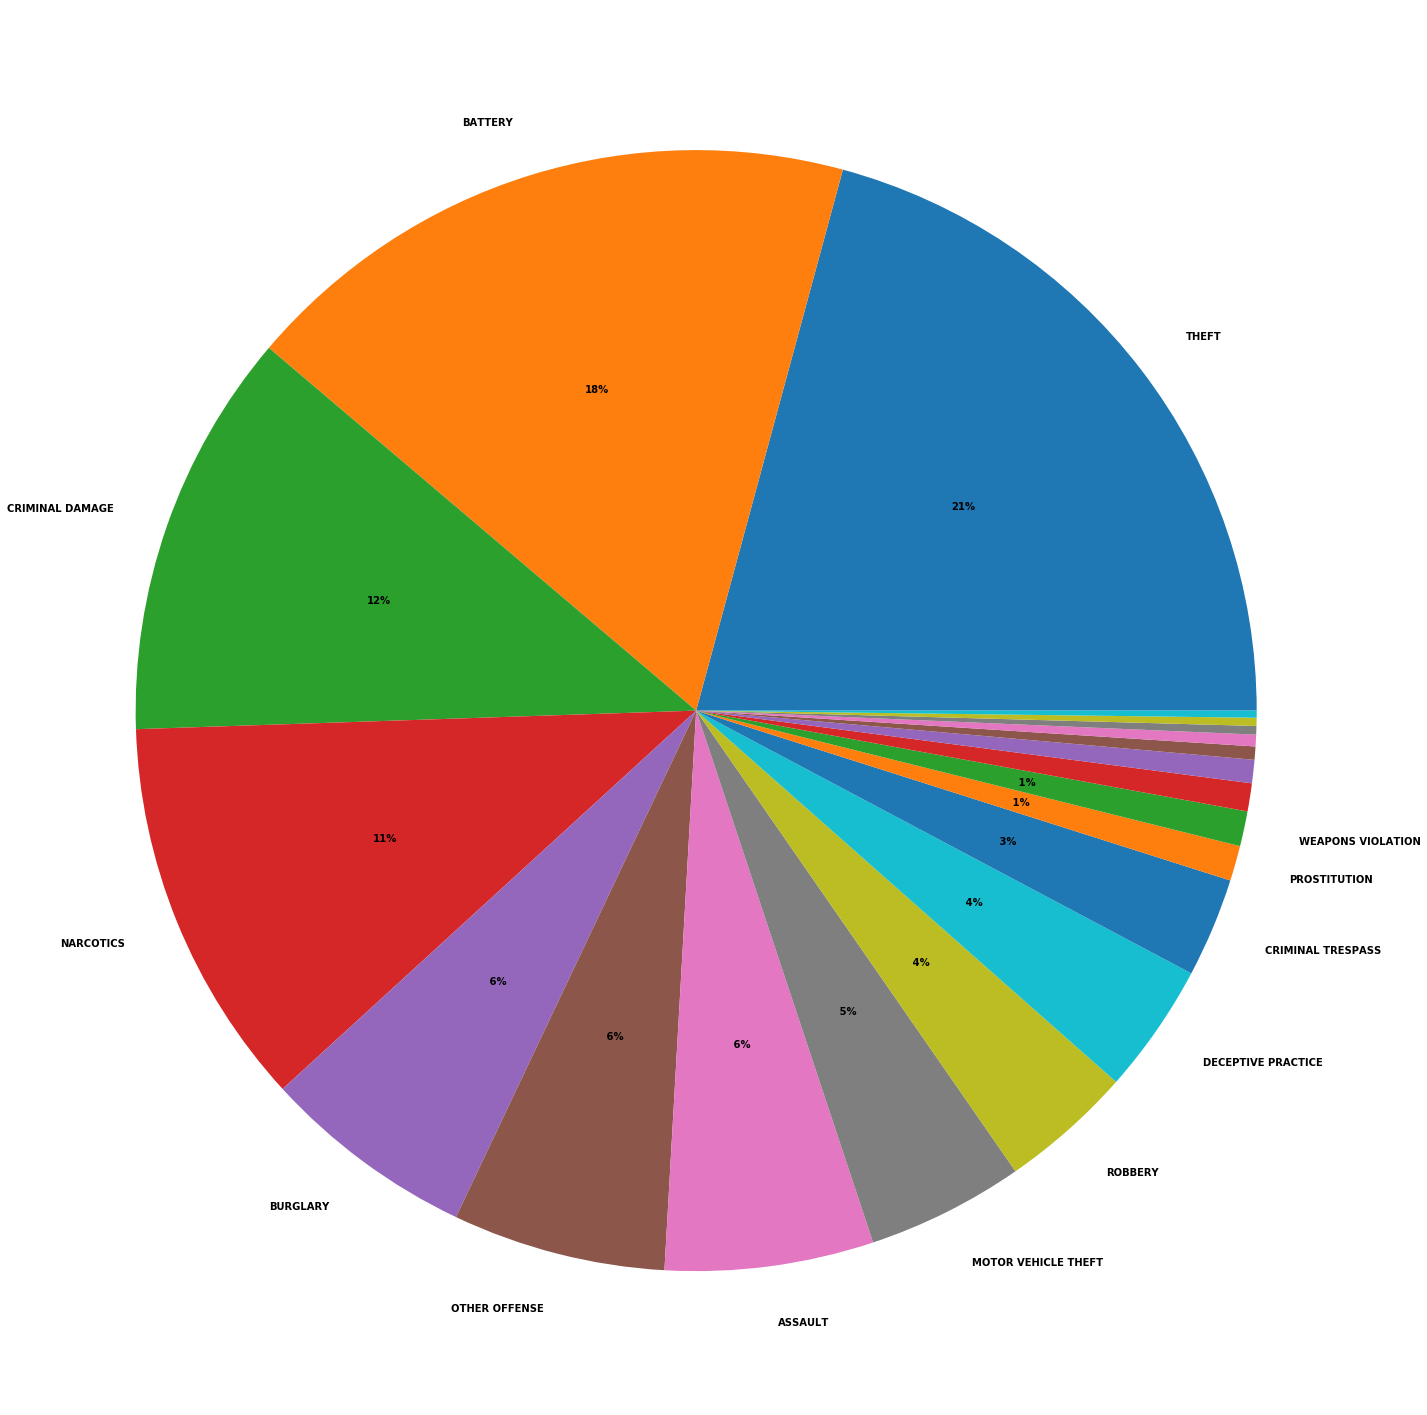

In [23]:
top_crime = dataset['Primary Type'].value_counts().iloc[:20]


i = 0
crime_count = []

for crime in top_crime.index:
    crime_count.append([crime , top_crime[i]])
    i = i + 1


plt.rc('font' , weight = 'bold')
f , ax = plt.subplots(figsize = (20 , 20))
crime_count.sort(key = lambda x:x[1] , reverse = True)
labels , sizes = zip(*crime_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n , v in crime_count]
ax.pie(sizes , labels = labels_selected , autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '' , shadow = False , startangle = 0)
ax.axis('equal')
plt.tight_layout()

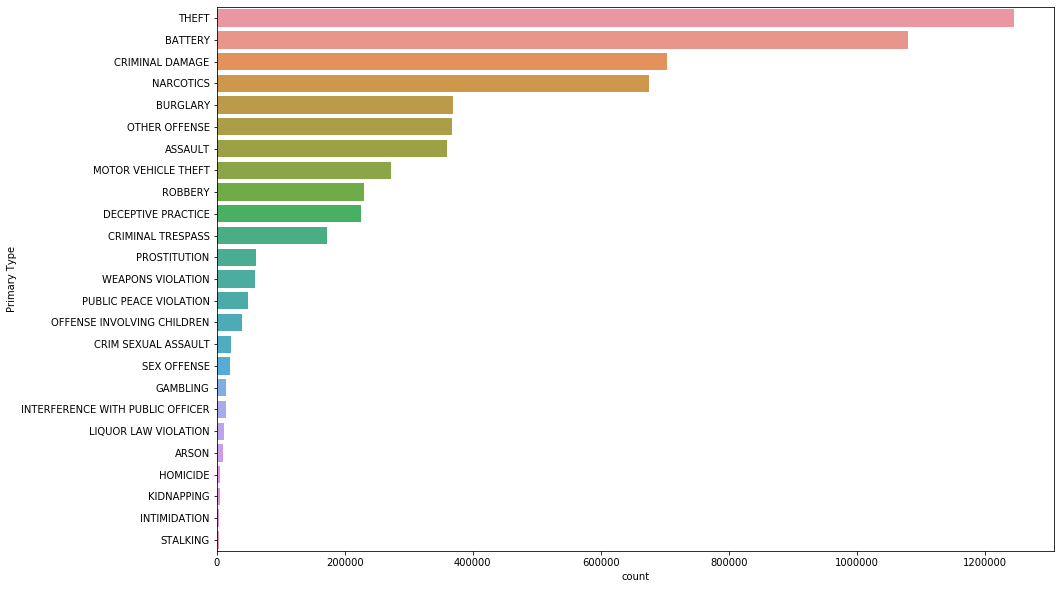

In [7]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type' , data = dataset , order = dataset['Primary Type'].value_counts().iloc[:25].index)

The most crime case is THEFT and the lowest is RITUALISM.21% cases are THEFT , 18% are BATTERY.Beside that there are many types of crime like BURGLARY , CRIMINAL DAMAGE and many more.

### Find the location Description

In [33]:
dataset['Location Description'].value_counts()

STREET           1517724
RESIDENCE         991977
SIDEWALK          674793
APARTMENT         668298
OTHER             216154
                  ...   
TRAILER                1
CTA PROPERTY           1
CHA PLAY LOT           1
ROOMING HOUSE          1
POOLROOM               1
Name: Location Description, Length: 161, dtype: int64

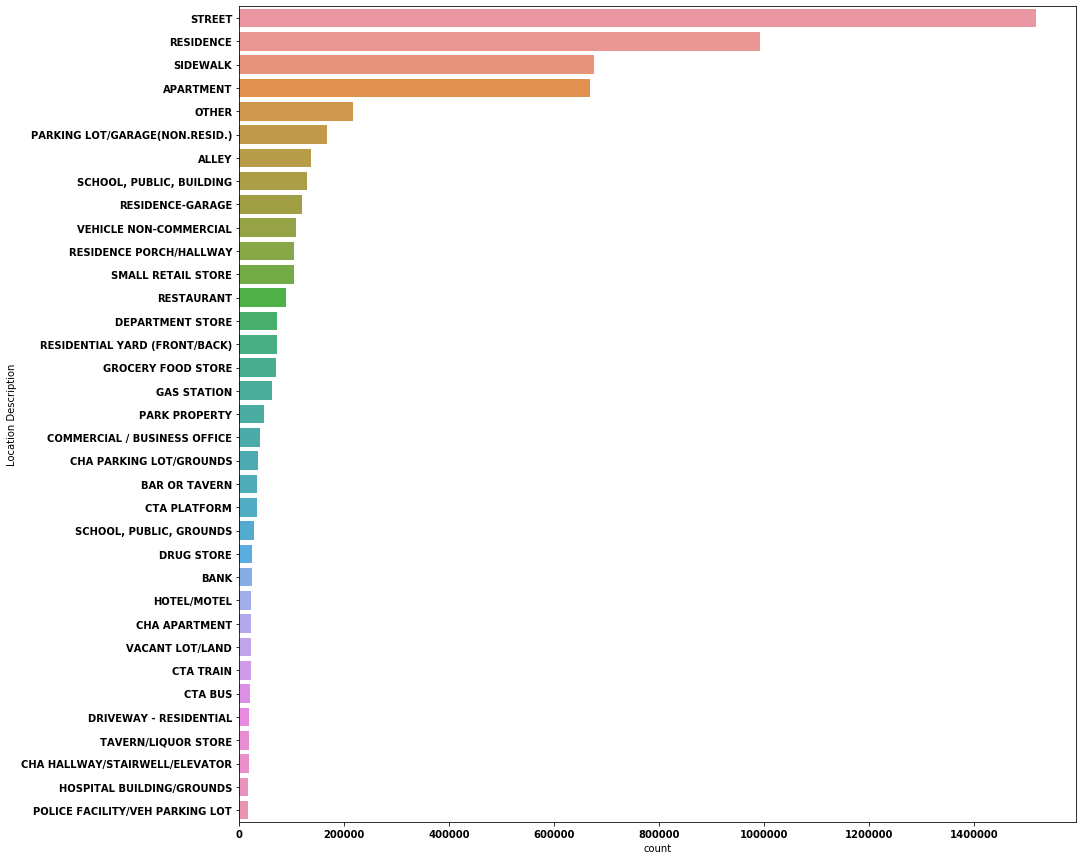

In [36]:
plt.figure(figsize = (15, 15))
sns.countplot(y= 'Location Description' , data = dataset , order = dataset['Location Description'].value_counts().iloc[:35].index)

Most of the Crime occured in STREETS.It is shocking that there are some crimes occured in POLICE-FACILITY area/zone.

### Arrest count

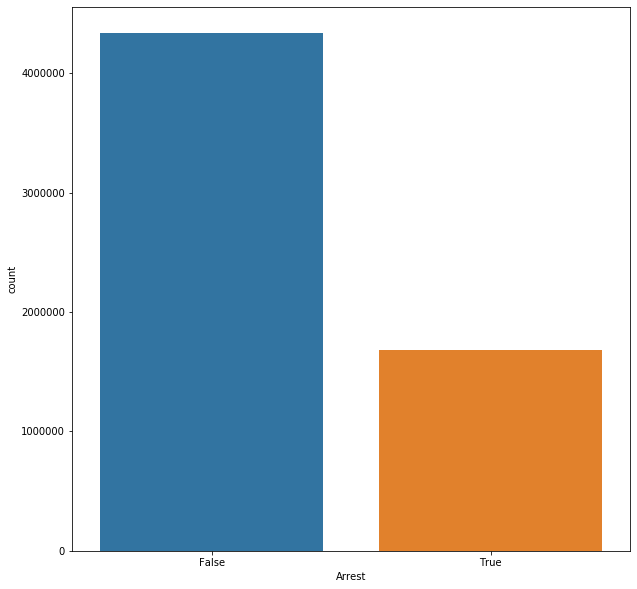

In [80]:
plt.figure(figsize = (10 , 10))
sns.countplot(x = 'Arrest' , data = dataset)

Most of the criminal are not arrested.It can be a good reason for increasing crimes.

Let's change the True and False value to binary number.

In [81]:
change_arrest = dataset
change_arrest.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2006-04-02 13:00:00,0,4673626,HM274058,2006-04-02 13:00:00,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
2006-02-26 13:40:48,1,4673627,HM202199,2006-02-26 13:40:48,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2006-01-08 23:16:00,2,4673628,HM113861,2006-01-08 23:16:00,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
2006-04-05 18:45:00,4,4673629,HM274049,2006-04-05 18:45:00,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
2006-02-17 21:03:14,5,4673630,HM187120,2006-02-17 21:03:14,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [82]:
change_arrest["Arrest"] = change_arrest["Arrest"].map({ "False": 0 , "True": 1})

In [84]:
# #change_arrest['Arrest'].value_counts()
# #change_arrest['Arrest'].astype(float)
# # change_arrest *= 1



# for i in range(len(change_arrest['Arrest'])):
#     if change_arrest['Arrest'][i] == 'TRUE':
#         change_arrest['Arrest'][i] = 1
#     elif change_arrest['Arrest'][i] == 'FALSE':
#         change_arrest['Arrest'][i] = 0

In [72]:
change_arrest.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2006-04-02 13:00:00,0,4673626,HM274058,2006-04-02 13:00:00,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,NaN,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
2006-02-26 13:40:48,1,4673627,HM202199,2006-02-26 13:40:48,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,NaN,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2006-01-08 23:16:00,2,4673628,HM113861,2006-01-08 23:16:00,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,NaN,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
2006-04-05 18:45:00,4,4673629,HM274049,2006-04-05 18:45:00,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,NaN,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
2006-02-17 21:03:14,5,4673630,HM187120,2006-02-17 21:03:14,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,NaN,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


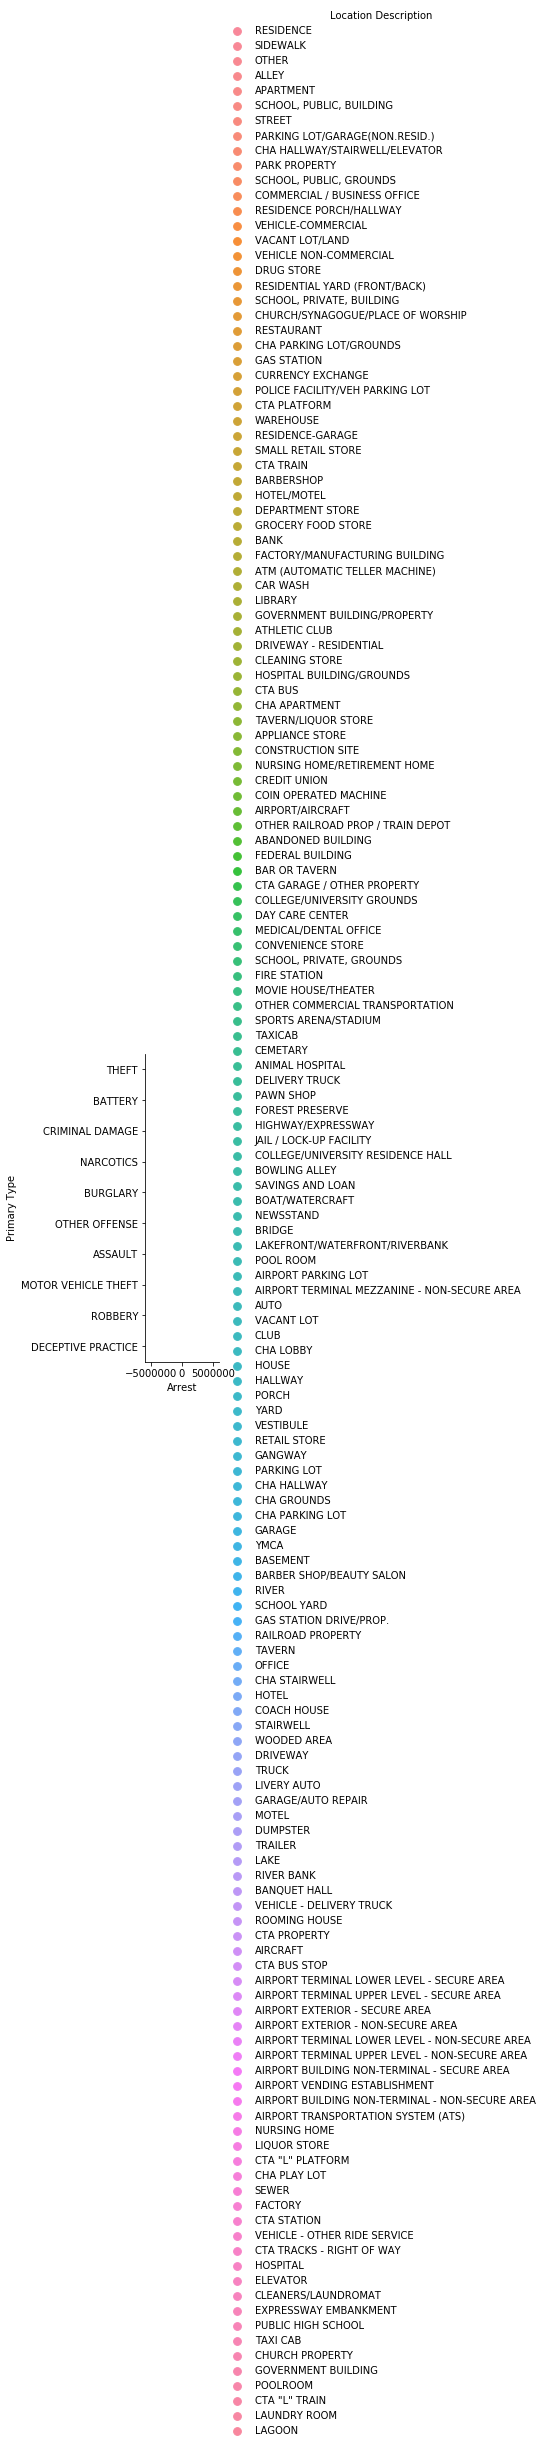

In [90]:
sns.catplot(x = 'Arrest' , y = 'Primary Type' ,  hue = 'Location Description' , data = dataset , order = dataset['Primary Type'].value_counts().iloc[:10].index)

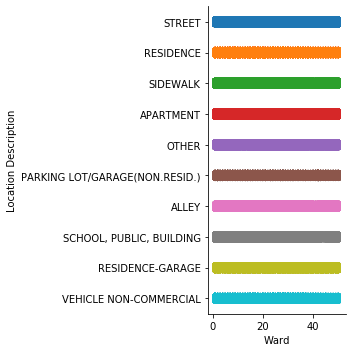

In [91]:
sns.catplot(x = 'Ward' , y = 'Location Description' , data = dataset , order = dataset['Location Description'].value_counts().iloc[:10].index)

### Work with Beat

This column is mainly indicates that the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car.

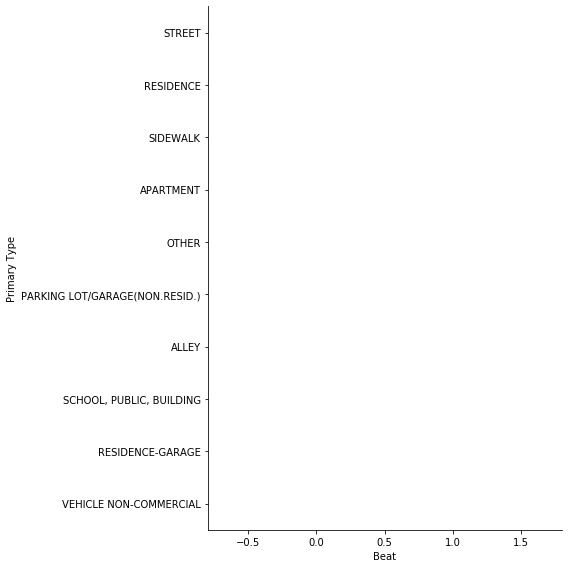

In [99]:
sns.catplot(x = 'Beat' , y = 'Primary Type' , data = dataset , order = dataset['Location Description'].value_counts().iloc[:10].index , height = 8 , palette = 'PRGn')

There are many more EDA can be done by this column.But due to MEMORY issue i cannot go further.

### Yearwise crime

There is month column in this dataset.We have to create this at first.

So now create Month column.

In [23]:
# dataset['YEAR'] = pd.DatetimeIndex(dataset['Date']).year
# dataset.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,YEAR
Date,,,,,,,,,,,,,,,,,,,,,
2006-04-02 13:00:00,0,4673626,HM274058,2006-04-02 13:00:00,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)",2006
2006-02-26 13:40:48,1,4673627,HM202199,2006-02-26 13:40:48,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)",2006
2006-01-08 23:16:00,2,4673628,HM113861,2006-01-08 23:16:00,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)",2006
2006-04-05 18:45:00,4,4673629,HM274049,2006-04-05 18:45:00,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)",2006
2006-02-17 21:03:14,5,4673630,HM187120,2006-02-17 21:03:14,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)",2006


In [24]:
dataset['Month'] = pd.DatetimeIndex(dataset['Date']).month
dataset.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,YEAR,Month
Date,,,,,,,,,,,,,,,,,,,,,
2006-04-02 13:00:00,0,4673626,HM274058,2006-04-02 13:00:00,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)",2006,4
2006-02-26 13:40:48,1,4673627,HM202199,2006-02-26 13:40:48,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)",2006,2
2006-01-08 23:16:00,2,4673628,HM113861,2006-01-08 23:16:00,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)",2006,1
2006-04-05 18:45:00,4,4673629,HM274049,2006-04-05 18:45:00,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)",2006,4
2006-02-17 21:03:14,5,4673630,HM187120,2006-02-17 21:03:14,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)",2006,2


Now check which area have most crime over the year.

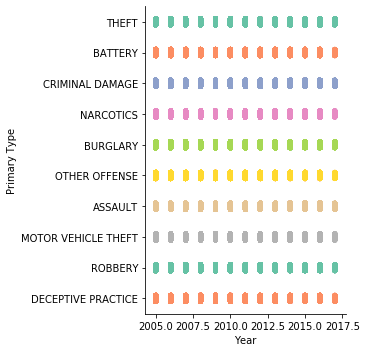

In [28]:
sns.catplot(x = 'Year' , y = 'Primary Type' , data = dataset , order = dataset['Primary Type'].value_counts().iloc[:10].index , palette = 'Set2')

### Location wise crime

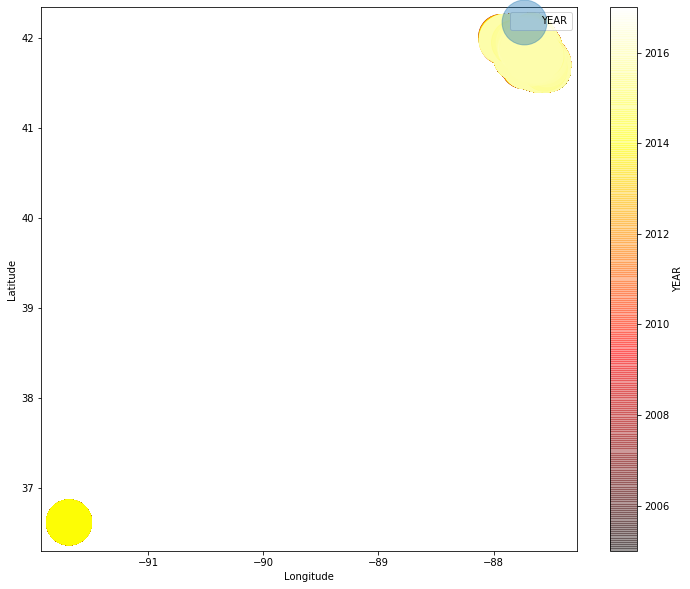

In [31]:
dataset.plot(kind = "scatter" , x = "Longitude" , y="Latitude", alpha = 0.4,
    s = dataset["YEAR"]/40 , label = "YEAR" , figsize = (12 , 10),
    c="YEAR" ,     
    cmap=plt.get_cmap("hot"), colorbar=True,
    sharex=False)

plt.legend()
#save_fig("Mping")

Delete some columns which are no used for our final prediction.

In [32]:
new_dataset = dataset.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location'] , axis = 1)

In [33]:
new_dataset.shape

(6017767, 13)

In [34]:
new_dataset.isnull().sum()

ID                          0
Date                        0
Block                       0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
District                   89
Latitude                74882
Longitude               74882
YEAR                        0
Month                       0
dtype: int64

We have mainly deleted those missing value columns and now we have only one missing value column left.The number of missing value is so low comparing with the dataset.

In [35]:
new_dataset = new_dataset.dropna()

In [36]:
new_dataset.isnull().sum()

ID                      0
Date                    0
Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
District                0
Latitude                0
Longitude               0
YEAR                    0
Month                   0
dtype: int64

In [37]:
new_dataset.shape

(5941323, 13)

In [38]:
new_dataset.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Latitude,Longitude,YEAR,Month
Date,,,,,,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,16.0,41.981913,-87.771996,2006,4
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,3.0,41.775733,-87.611920,2006,2
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,3.0,41.769897,-87.593671,2006,1
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False,16.0,41.942984,-87.780057,2006,4
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,8.0,41.784211,-87.716745,2006,2


#### Now plot some graph of find out the Crime in some criteria

In [51]:
new_dataset.resample('D').size()

Date
2005-01-01    1622
2005-01-02    1066
2005-01-03    1082
2005-01-04    1122
2005-01-05     935
              ... 
2017-01-14       3
2017-01-15       2
2017-01-16       3
2017-01-17       1
2017-01-18       3
Freq: D, Length: 4401, dtype: int64

Text(0, 0.5, 'Number of Crimes')

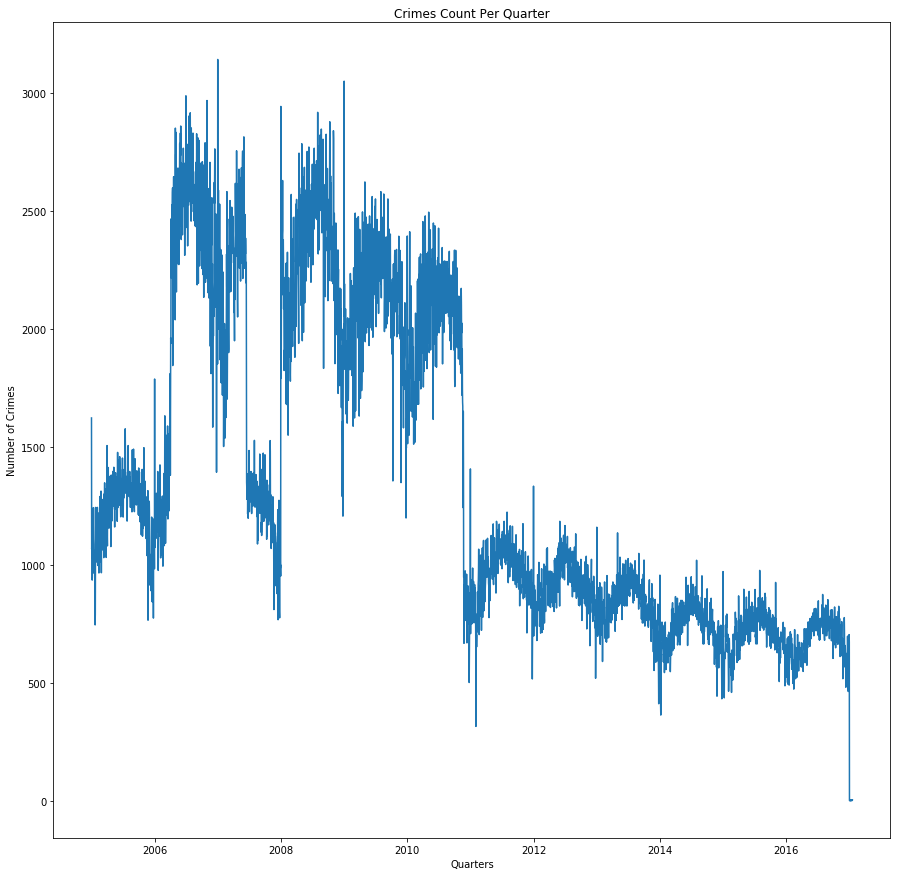

In [53]:
plt.figure(figsize = (15 , 15))
plt.plot(new_dataset.resample('D').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

Now resample in Month-wise

In [45]:
new_dataset.resample('M').size()

Date
2005-01-31    33424
2005-02-28    31724
2005-03-31    36668
2005-04-30    38598
2005-05-31    40334
              ...  
2016-09-30    22402
2016-10-31    22530
2016-11-30    20428
2016-12-31    19070
2017-01-31       30
Freq: M, Length: 145, dtype: int64

Text(0, 0.5, 'Number of Crimes')

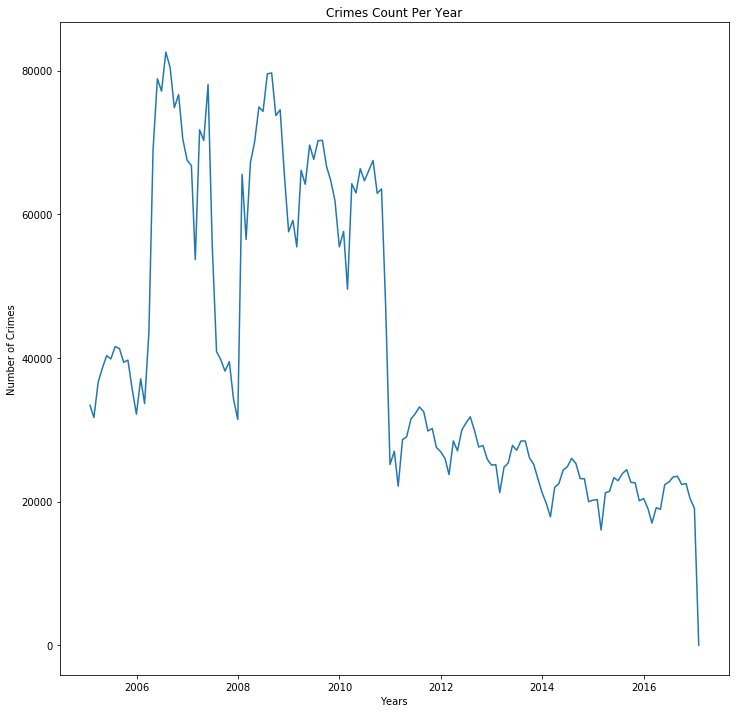

In [47]:
plt.figure(figsize = (12 , 12))
plt.plot(new_dataset.resample('M').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [48]:
new_dataset.resample('Q').size()

Date
2005-03-31    101816
2005-06-30    118815
2005-09-30    122334
2005-12-31    107654
2006-03-31    114348
2006-06-30    225061
2006-09-30    237880
2006-12-31    214744
2007-03-31    192298
2007-06-30    204100
2007-09-30    118851
2007-12-31    105269
2008-03-31    189296
2008-06-30    219337
2008-09-30    233027
2008-12-31    197785
2009-03-31    180777
2009-06-30    201511
2009-09-30    207285
2009-12-31    182010
2010-03-31    171489
2010-06-30    194027
2010-09-30    196561
2010-12-31    135787
2011-03-31     77806
2011-06-30     92789
2011-09-30     95555
2011-12-31     84707
2012-03-31     78255
2012-06-30     88027
2012-09-30     89307
2012-12-31     78840
2013-03-31     71238
2013-06-30     80407
2013-09-30     83031
2013-12-31     69594
2014-03-31     59574
2014-06-30     71799
2014-09-30     74546
2014-12-31     63412
2015-03-31     57605
2015-06-30     67728
2015-09-30     71075
2015-12-31     63204
2016-03-31     55261
2016-06-30     64064
2016-09-30     69379
2016-12-

Text(0, 0.5, 'Number of Crimes')

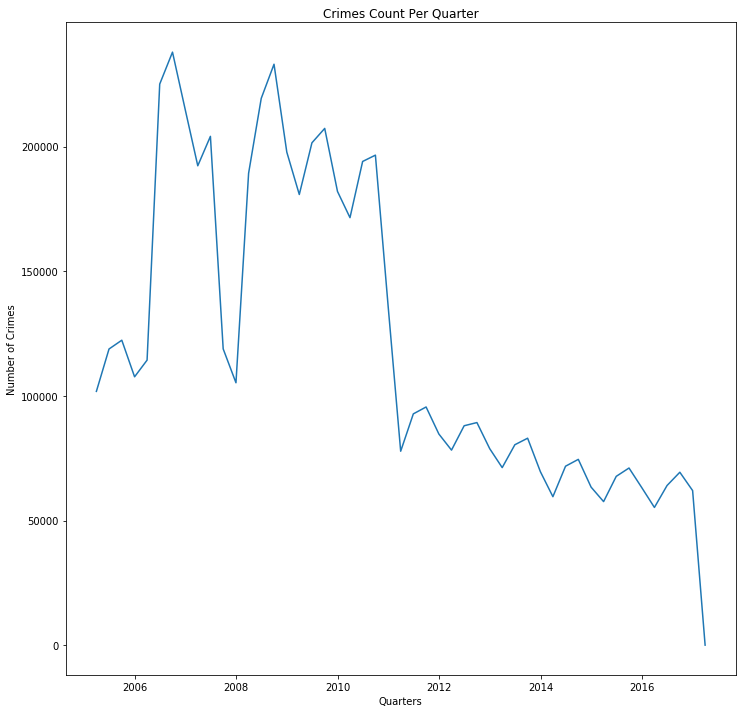

In [50]:
plt.figure(figsize = (12 , 12))
plt.plot(new_dataset.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

In [41]:
new_dataset.resample('Y').size()

Date
2005-12-31    450619
2006-12-31    792033
2007-12-31    620518
2008-12-31    839445
2009-12-31    771583
2010-12-31    697864
2011-12-31    350857
2012-12-31    334429
2013-12-31    304270
2014-12-31    269331
2015-12-31    259612
2016-12-31    250732
2017-12-31        30
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

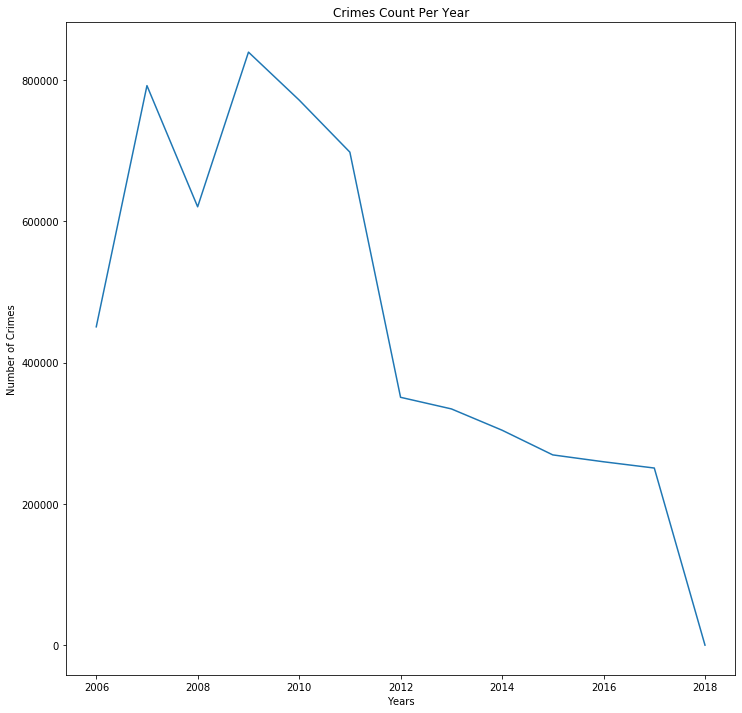

In [43]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.figure(figsize = (12 , 12))
plt.plot(new_dataset.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

It is clear that the number of crime is decreasing year by year.Crimes drastically decresing between 2016 to 2018